In [1]:
import cv2
from forwardF import wm_au_emb
import numpy as np
from matplotlib import pyplot as plt
from detectF import *
from recoveryF import stage1_recovery,stage2_recovery,stage22_recovery

In [2]:
image = cv2.imread("D:\\2023\\Tamper_Recover\\A_Data\\png\\Lena.png")

In [4]:
def attack_JPEG_Compress(data,Q=95):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), Q]
    result, encimg = cv2.imencode('.jpg',data, encode_param)
    decimg = cv2.imdecode(encimg,1)
    return decimg

In [3]:
w_image = wm_au_emb(image,(13,137,811))

In [5]:
w_image_80 = attack_JPEG_Compress(w_image,Q=80)

In [6]:
lv1_matrix = level_one_detection(w_image_80)
lv2_matrix = lv1_matrix.copy()
lv3_matrix = lv1_matrix.copy()
for channel in range(3):
    lv2_matrix[:,:,channel] = level_two_detection(lv1_matrix[:,:,channel])
    lv3_matrix[:,:,channel] = level_three_detection(lv2_matrix[:,:,channel])

r1_img,lv4_BGR= stage1_recovery(t_img=w_image_80,key=(13,137,811))
r2_img,lv5_BGR = stage22_recovery(r1_img=r1_img,lv4_matrix=lv4_BGR)
mask1 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv5_BGR[int(i/1),int(j/1),0]:
            mask1[i,j] = 255
mask2 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv5_BGR[int(i/1),int(j/1),1]:
            mask2[i,j] = 255
mask3 = np.zeros((512,512),dtype = np.uint8)
for i in range(512):
    for j in range(512):
        if not lv5_BGR[int(i/1),int(j/1),2]:
            mask3[i,j] = 255
r3_img = w_image_80.copy()
r3_img[:,:,0] = cv2.inpaint(r2_img[:,:,0],mask1,1,cv2.INPAINT_TELEA)
r3_img[:,:,1] = cv2.inpaint(r2_img[:,:,1],mask2,1,cv2.INPAINT_TELEA)
r3_img[:,:,2] = cv2.inpaint(r2_img[:,:,2],mask3,1,cv2.INPAINT_TELEA)

In [8]:
print(cv2.PSNR(r3_img,w_image))

33.250086415019865


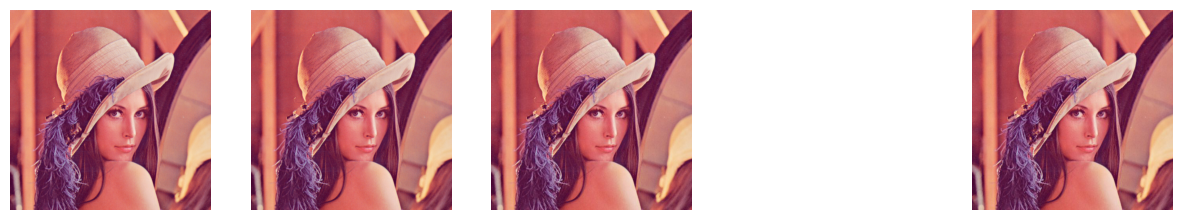

In [7]:
fig, axes = plt.subplots(1, 5,figsize = (15,24))
for j in range(5):
    axes[j].set_axis_off()
      
axes[0].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[1].imshow(cv2.cvtColor(w_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[2].imshow(cv2.cvtColor(w_image_80,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
axes[3].imshow(1-(lv3_matrix[:,:,0]&lv3_matrix[:,:,1]&lv3_matrix[:,:,2]), cmap=plt.cm.gray,vmax=1,vmin=0)
axes[4].imshow(cv2.cvtColor(r3_img,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray,vmax=255,vmin=0)
